# Chapter 6: DecisionTreeClassifier

In [1]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
import pydotplus

import pandas as pd
import numpy as np
import graphviz

In [2]:
X = np.array([["Red", "Sports", "Domestic"],
              ["Red", "Sports", "Domestic"], 
              ["Red", "Sports", "Domestic"], 
              ["Yellow", "Sports", "Domestic"], 
              ["Yellow", "Sports", "Imported"],
              ["Yellow", "SUV", "Imported"], 
              ["Yellow", "SUV", "Imported"], 
              ["Yellow", "SUV", "Domestic"],
              ["Red", "SUV", "Imported"], 
              ["Red", "Sports", "Imported"]])
Y = np.array(["Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "Yes"])

In [3]:
X = pd.DataFrame(X, columns = ['color', 'type', 'origin'])
X_now = pd.get_dummies(X)
X_now

,color_Red,color_Yellow,type_SUV,type_Sports,origin_Domestic,origin_Imported
0,1,0,0,1,1,0
1,1,0,0,1,1,0
2,1,0,0,1,1,0
3,0,1,0,1,1,0
4,0,1,0,1,0,1
5,0,1,1,0,0,1
6,0,1,1,0,0,1
7,0,1,1,0,1,0
8,1,0,1,0,0,1
9,1,0,0,1,0,1


In [4]:
Y = pd.DataFrame(Y, columns = ['stolen'])
Y_now = pd.get_dummies(Y, drop_first=True)
Y_now

,stolen_Yes
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,0
9,1


In [5]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# co the thay the bang criterion='entropy' tuy bai toan
model_tree = DecisionTreeClassifier() 
model_tree.fit(X_now, Y_now)

DecisionTreeClassifier()

In [6]:
# Make new prediction
import numpy as np
X_new = np.array([[0, 1, 0, 1,1,0]
                  ])

In [7]:
yhat_new = model_tree.predict(X_new)
yhat_new

c:\Users\NK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

### Note:
- Gini is intended for continuous attributes and Entropy is for attributes that occur in classes. 
- Gini is to minimize misclassification
- Entropy is for exploratory analysis
- Entropy is a little slower to compute

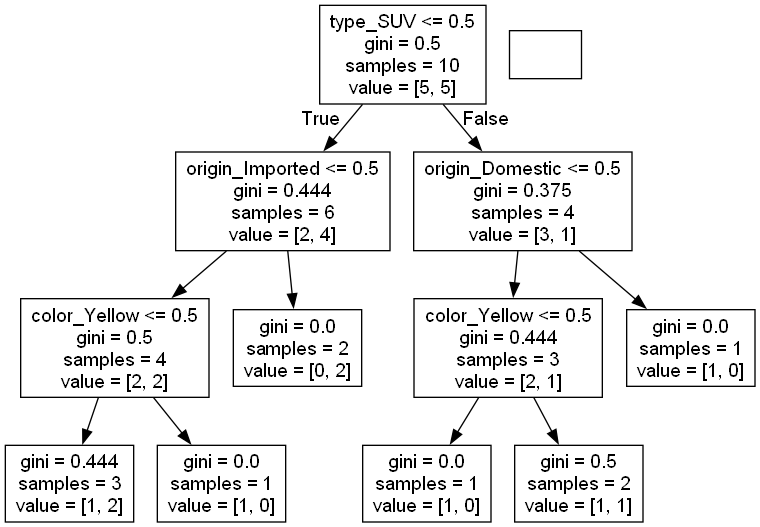

In [8]:
dot_data = tree.export_graphviz(model_tree,out_file=None,feature_names=X_now.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())